In [1]:
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Read the data and display
import pandas as pd
df=pd.read_excel('Flight_Fare.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Here only two missing value
# Subsitute the missing value with Mode
df.loc[df.Route.isnull()==True,'Route']='DEL → BOM → COK' #df.Route.mode()
df.loc[df.Total_Stops.isnull()==True,'Total_Stops']='1 stop' #df.Total_Stops.mode()

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.Price.value_counts()    # Our target variable is price and data set is imbalanced

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

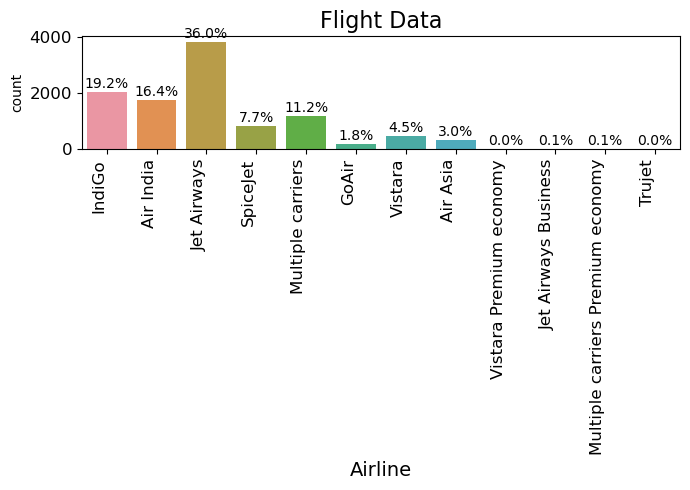

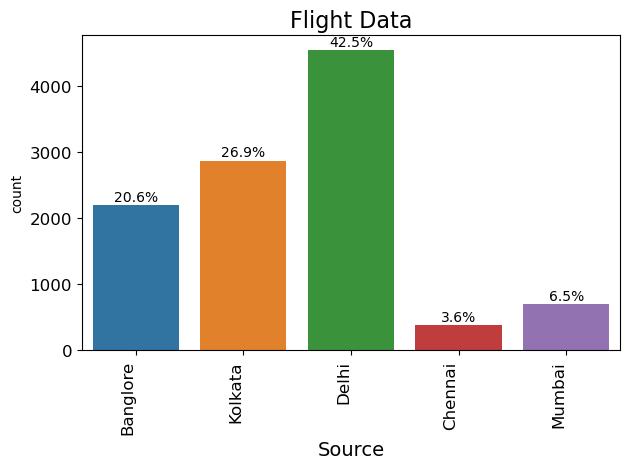

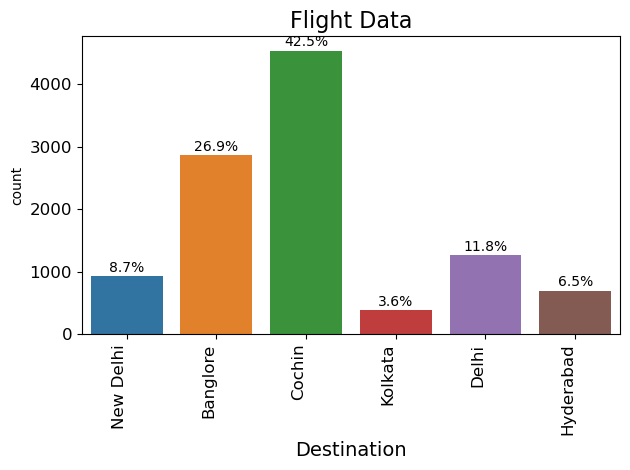

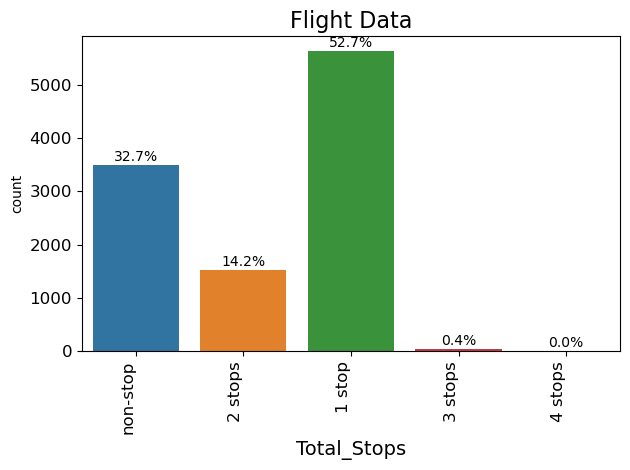

In [10]:
var=['Airline',  'Source', 'Destination',  'Total_Stops',]
# des_var=df.columns
plt.figure(figsize=(7, 5))
for i in var :
    ax =sns.countplot(x=i,data=df )
    plt.xticks(size =12)
    plt.xlabel(i, size = 14)
    plt.yticks(size = 12)
    #plt.ylabel('Price Range', size = 12)
    plt.title("Flight Data", size=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    
    plt.show()

#### This data set Jet Airways have highest number of service (36% of toatal service). 
#### Delhi is top in source place (42.5%) and Cochin is top in the destination place(42.5)
#### 52.7 % Flight services have 1 stop and 32.7% flight are non stop

### Access data and month from ' Date of Journy'

In [11]:
df['Journey_Day']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey']).dt.month


In [12]:
df['Journey_Month']

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Journey_Month, Length: 10683, dtype: int64

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


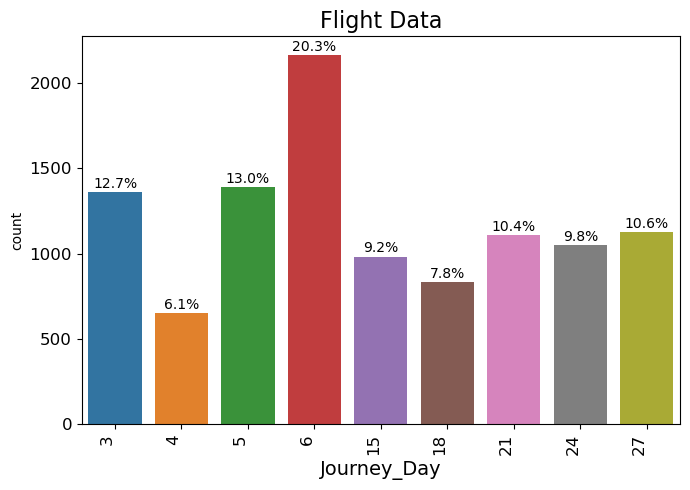

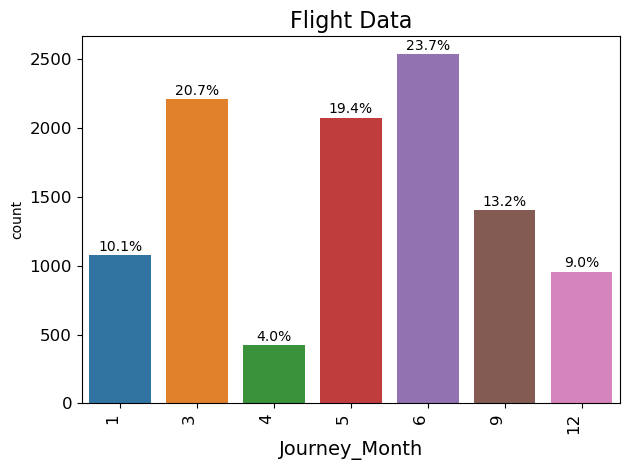

In [14]:
date_var=['Journey_Day','Journey_Month']
# des_var=df.columns
plt.figure(figsize=(7, 5))
for i in date_var :
    ax =sns.countplot(x=i,data=df )
    plt.xticks(size =12)
    plt.xlabel(i, size = 14)
    plt.yticks(size = 12)
    #plt.ylabel('Price Range', size = 12)
    plt.title("Flight Data", size=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    
    plt.show()

### Here we can see the highest service in the data the first two weeks .March ,May and June are Top services in month April is in bottom

In [15]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
df.shape

(10683, 12)

In [17]:
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [19]:
df.drop('Dep_Time',axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


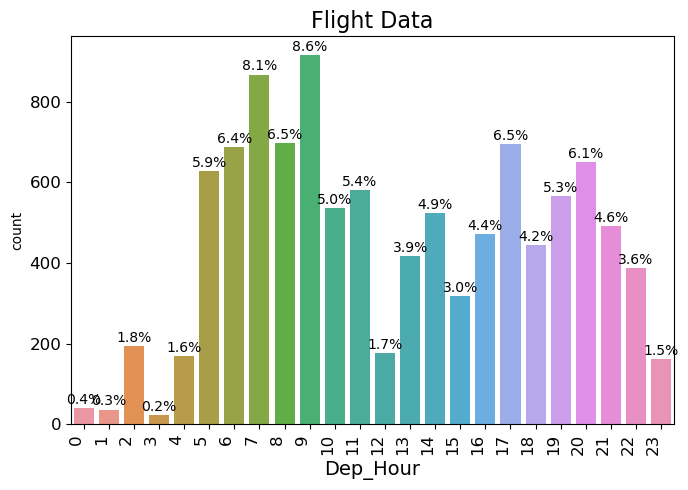

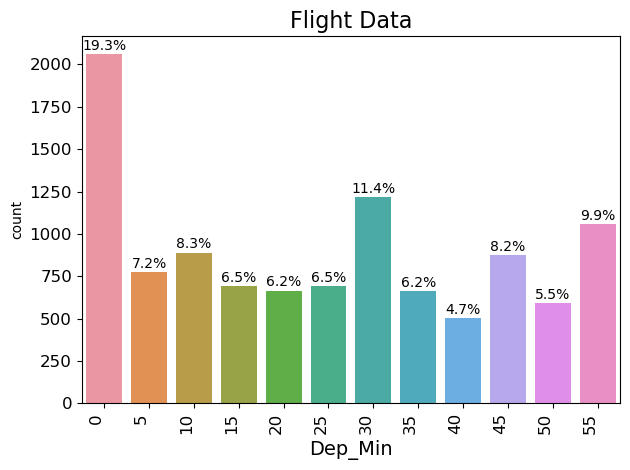

In [21]:
time_var=['Dep_Hour','Dep_Min']
# des_var=df.columns
plt.figure(figsize=(7, 5))
for i in time_var :
    ax =sns.countplot(x=i,data=df )
    plt.xticks(size =12)
    plt.xlabel(i, size = 14)
    plt.yticks(size = 12)
    #plt.ylabel('Price Range', size = 12)
    plt.title("Flight Data", size=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    
    plt.show()

####  Here we can see Peek time is 6am to 9am

In [37]:
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [38]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [39]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Duration_hour,Duration_minute,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,1,7662,5,1,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,1,13882,6,9,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,2,6218,5,12,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,2,13302,3,1,16,50,4,45,21,35


In [40]:
df.Duration.head()

AttributeError: 'DataFrame' object has no attribute 'Duration'

In [ ]:


# Split the duration column into two separate columns
df[['Duration_hour', 'Duration_minute']] = df['Duration'].str.split("h", expand=True)

# Replace any non-numeric values in the hour column with 0
df['Duration_hour'] = df['Duration_hour'].apply(lambda x: 0 if not x.isnumeric() else x)

# Convert the hour column to integer data type
df['Duration_hour'] = df['Duration_hour'].astype(int)

# Remove the "m" character from the minute column
df['Duration_minute'] = df['Duration_minute'].str.replace("m", "")


df['Duration_minute'] = pd.to_numeric(df['Duration_minute'], errors='coerce').fillna(0).astype(int)


# Convert the minute column to integer data type
df['Duration_minute'] = df['Duration_minute'].astype(int)



In [24]:
df.drop(['Duration'],axis=1,inplace=True)

In [25]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,6,9,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,3,1,16,50,4,45


## Handling Categorical Data

In [26]:
df.Airline.value_counts()  # Total 12 Flights Jet Airways have highest service

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
Airline=df['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [29]:
Source=df['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
Destination=df['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [42]:
# Encode the categorical variable using .factorize()
df['Total_Stops'] = df['Total_Stops'].factorize()[0]
df.Total_Stops.value_counts()

2    5626
0    3491
1    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [33]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Duration_hour,Duration_minute,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,1,7662,5,1,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,1,13882,6,9,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,2,6218,5,12,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,2,13302,3,1,16,50,4,45,21,35


In [43]:
df_train=pd.concat([df,Airline,Source,Destination],axis=1)
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Duration_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1,7662,5,1,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,13882,6,9,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,2,6218,5,12,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,2,13302,3,1,16,50,4,...,0,0,0,0,0,0,0,0,0,1


In [44]:
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [45]:
df_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Duration_hour,Duration_minute,Arrival_Hour,Arrival_Min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,5,1,5,50,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,6,9,9,25,19,0,4,25,...,0,0,1,0,0,1,0,0,0,0
3,2,6218,5,12,18,5,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,2,13302,3,1,16,50,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10683 non-null  int64
 1   Price                              10683 non-null  int64
 2   Journey_Day                        10683 non-null  int64
 3   Journey_Month                      10683 non-null  int64
 4   Dep_Hour                           10683 non-null  int64
 5   Dep_Min                            10683 non-null  int64
 6   Duration_hour                      10683 non-null  int32
 7   Duration_minute                    10683 non-null  int32
 8   Arrival_Hour                       10683 non-null  int64
 9   Arrival_Min                        10683 non-null  int64
 10  Air India                          10683 non-null  uint8
 11  GoAir                              10683 non-null  uint8
 12  IndiGo            

In [48]:
df_train.shape

(10683, 30)